In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [10]:
model = joblib.load("../src/xgboost_model.pkl")

X_val = pd.read_csv("../data/splits/X_val.csv")
y_val = pd.read_csv("../data/splits/y_val.csv")

X_test = pd.read_csv("../data/splits/X_test.csv")
y_test = pd.read_csv("../data/splits/y_test.csv")



In [12]:
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)


In [14]:
def evaluate(y_true, y_pred, label="Set"):
    rmse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} RMSE: {rmse:.2f}")
    print(f"{label} R²: {r2:.4f}")

evaluate(y_val, val_pred, label="Validation")
evaluate(y_test, test_pred, label="Test")


Validation RMSE: 146850.34
Validation R²: 0.9630
Test RMSE: 141551.30
Test R²: 0.9641


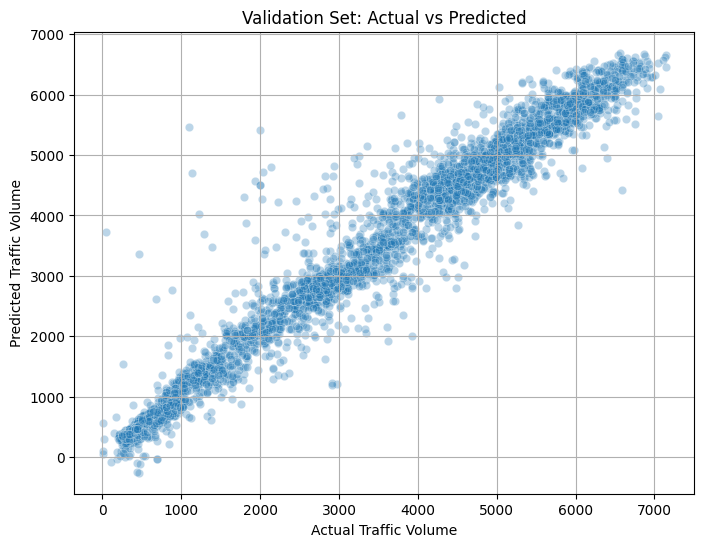

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val.values.flatten(), y=val_pred, alpha=0.3)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Validation Set: Actual vs Predicted")
plt.grid(True)
plt.savefig("../outputs/val_actual_vs_pred.png")
plt.show()


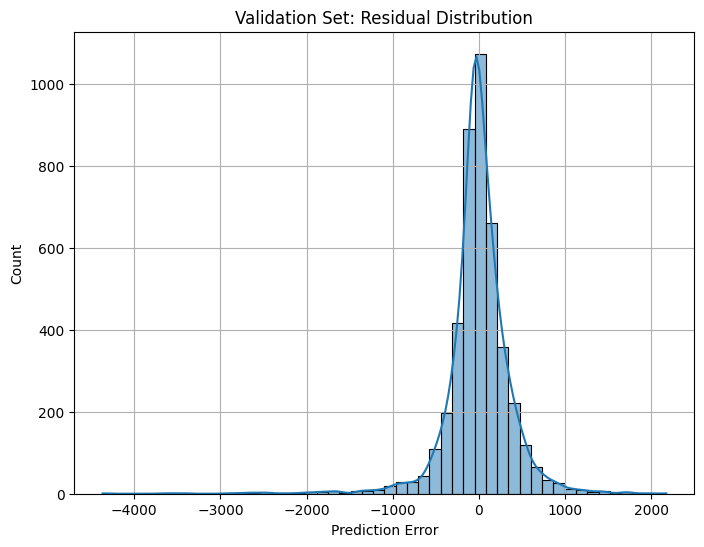

In [16]:
residuals = y_val.values.flatten() - val_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Validation Set: Residual Distribution")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.savefig("../outputs/val_residuals.png")
plt.show()


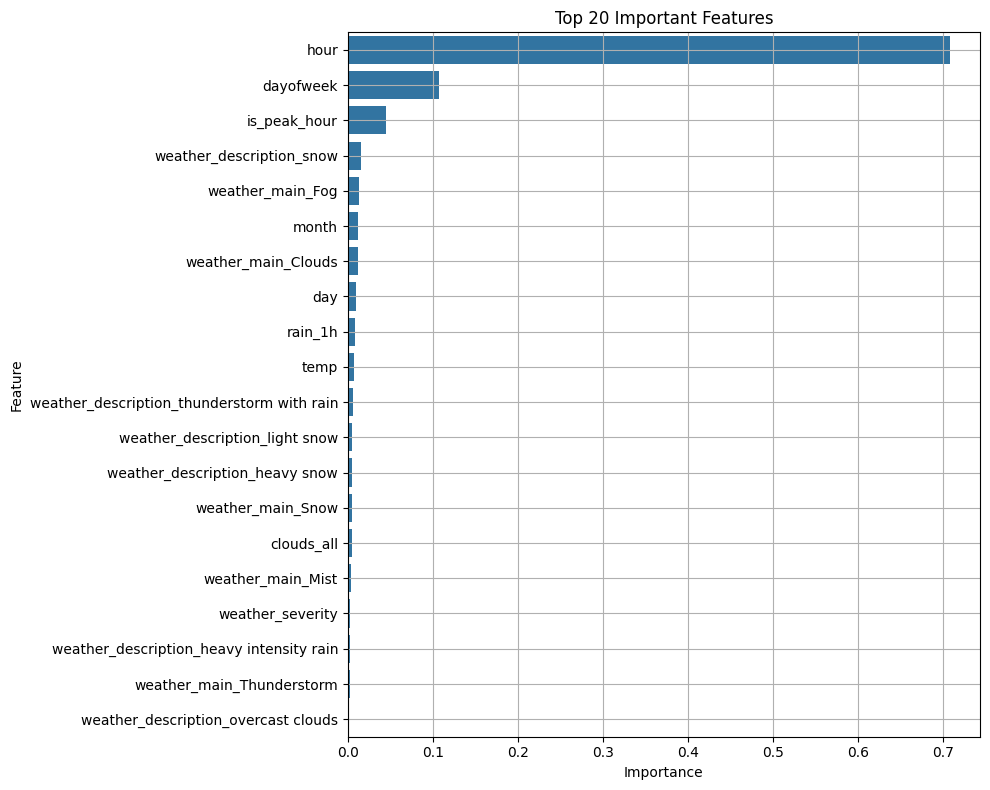

In [17]:
importances = model.feature_importances_
features = X_val.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(20))
plt.title("Top 20 Important Features")
plt.grid(True)
plt.tight_layout()
plt.savefig("../outputs/feature_importance.png")
plt.show()


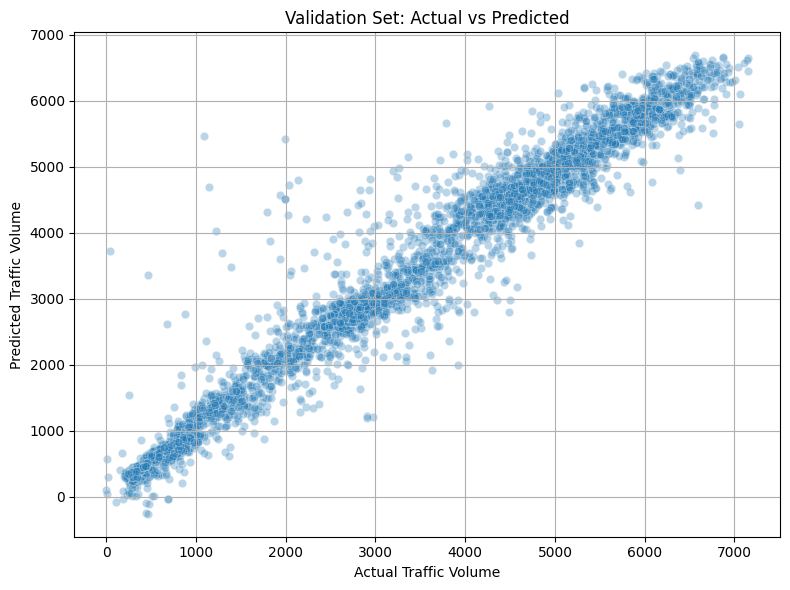

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val.values.flatten(), y=val_pred, alpha=0.3)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Validation Set: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig("../outputs/val_actual_vs_pred.png", dpi=300)

# Show on screen
plt.show()


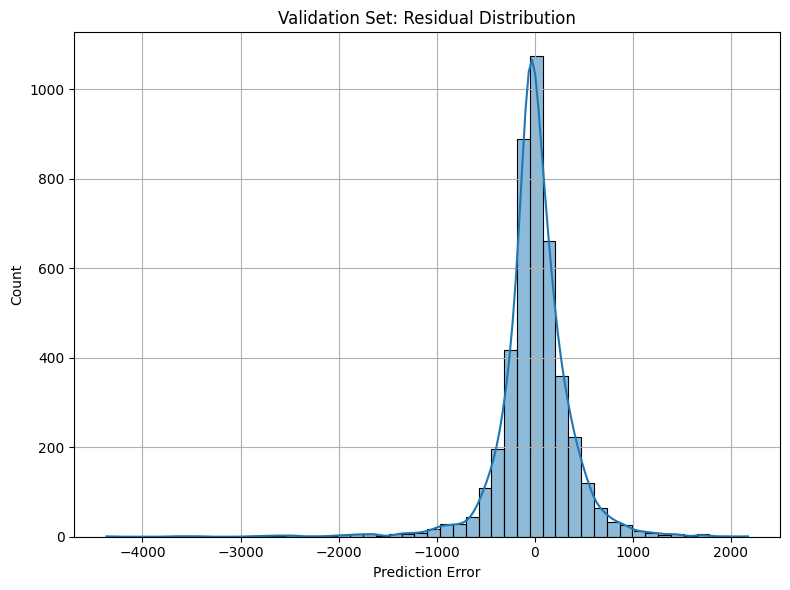

In [19]:
residuals = y_val.values.flatten() - val_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Validation Set: Residual Distribution")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig("../outputs/val_residuals.png", dpi=300)

# Show
plt.show()


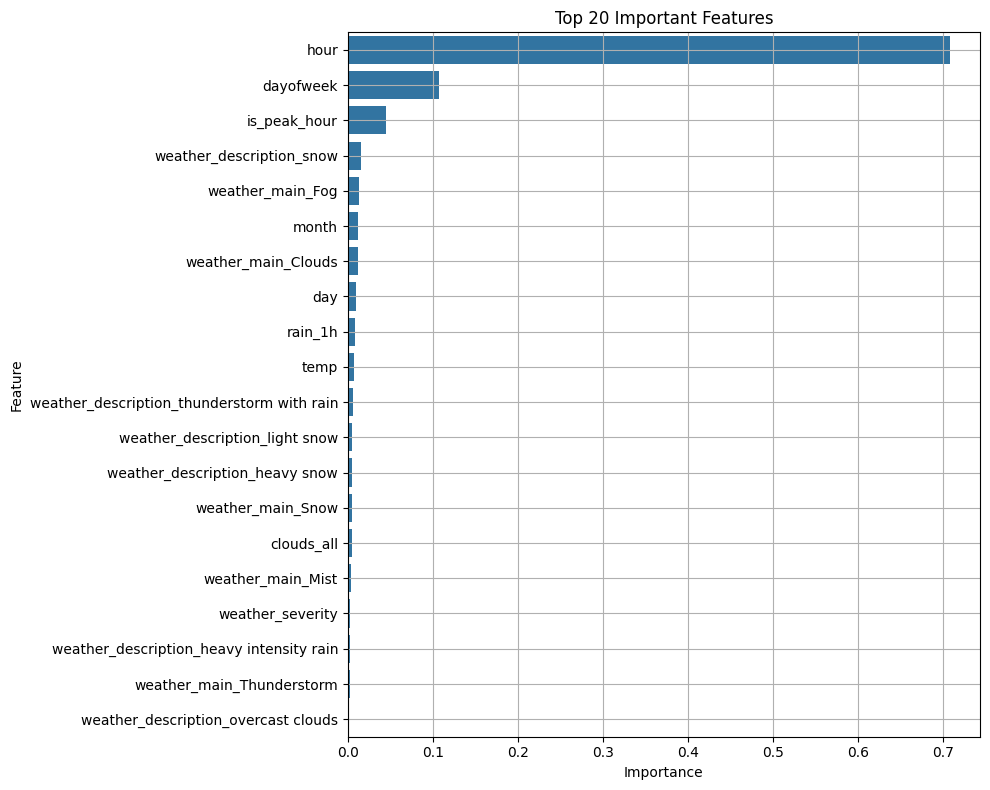

In [20]:
importances = model.feature_importances_
features = X_val.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(20))
plt.title("Top 20 Important Features")
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig("../outputs/feature_importance.png", dpi=300)

# Show
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load full cleaned data
df = pd.read_csv("../data/cleaned/cleanedMITV.csv")
os.makedirs("../outputs", exist_ok=True)


In [22]:
# Only numeric columns
corr_matrix = df.corr(numeric_only=True)

# Focused: Sort by target correlation
sorted_corr = corr_matrix['traffic_volume'].sort_values(ascending=False)
print("Top correlated features with traffic_volume:\n", sorted_corr.head(10))


Top correlated features with traffic_volume:
 traffic_volume    1.000000
hour              0.351330
temp              0.130143
clouds_all        0.067969
rain_1h           0.005131
snow_1h          -0.002855
Name: traffic_volume, dtype: float64


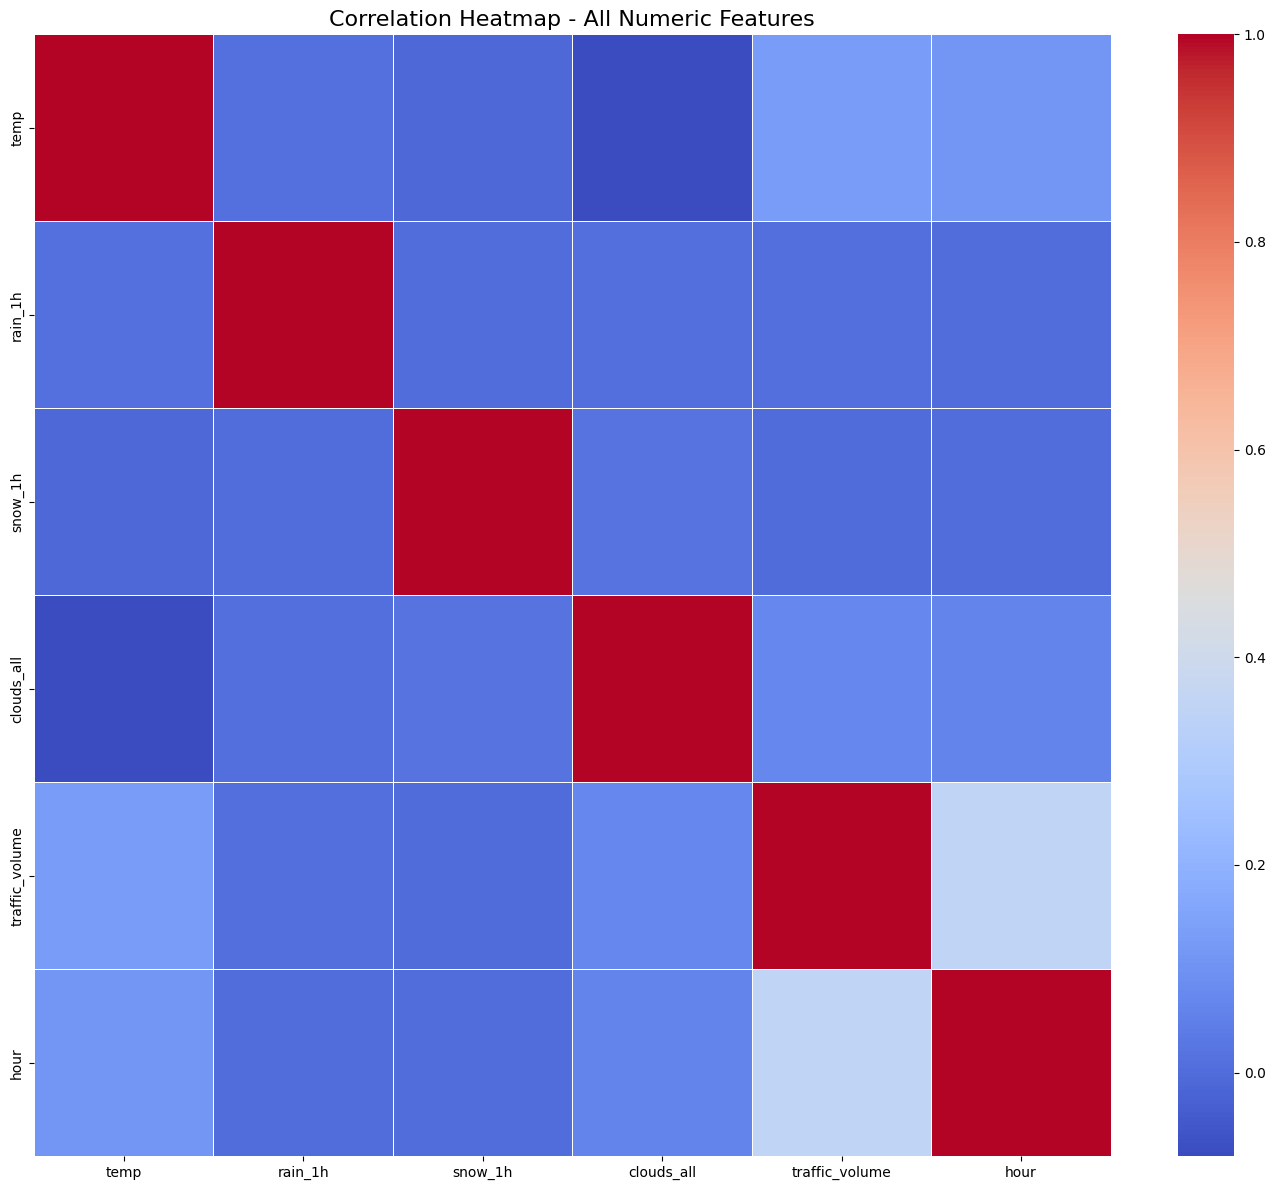

In [23]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - All Numeric Features", fontsize=16)
plt.tight_layout()

# Save it
plt.savefig("../outputs/full_correlation_heatmap.png", dpi=300)
plt.show()


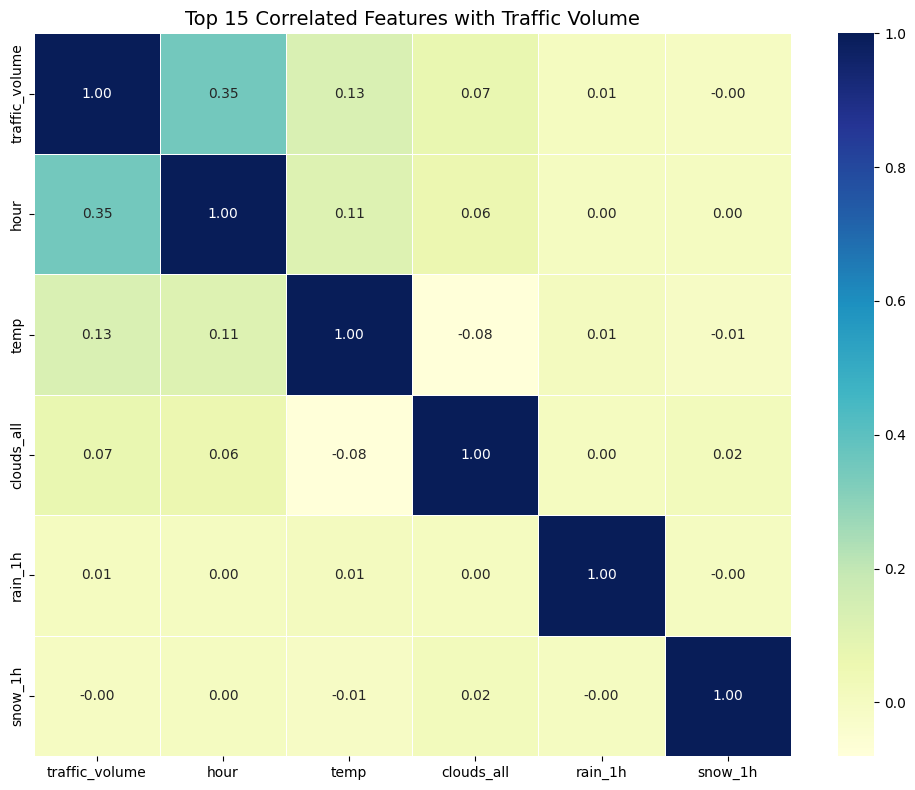

In [24]:
top_features = sorted_corr.head(15).index
plt.figure(figsize=(10,8))
sns.heatmap(df[top_features].corr(), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Top 15 Correlated Features with Traffic Volume", fontsize=14)
plt.tight_layout()

# Save
plt.savefig("../outputs/top15_corr_heatmap.png", dpi=300)
plt.show()


In [25]:
import joblib

joblib.dump(X_train.columns.tolist(), "../models/feature_columns.pkl")


NameError: name 'X_train' is not defined